# DfAM: Design for Additive Manufacture
# Tutorial 7 : Foot Pressure Map

Written by Dr. Connor Myant, revised by Erin Yu, Imperial College London, v1 14/02/2020, v2 26/02/2024 <br>
Comments and corrections to connor.myant@imperial.ac.uk, erin.yu22@imperial.ac.uk <br>
All lecture resources may be found on Blackboard 

-----------

### Objective of this tutorial

In this tutorial, you will learn to 
- Convert foot pressure data from a mesh data set into a point cloud list --> Python
- Then import that list into Fusion360 as a set of points using a customn API script --> Fusion 360

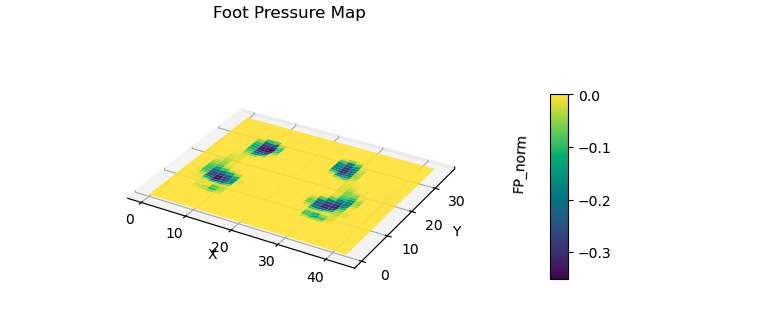

### Before you get started

<font color='blue'> Download foot pressure.csv from Blackboard and place it in the same folder as this notebook.

#### Import library

We expect you have already run tutorial 1 (python installer), if this is not the case please do that first, all instructions are on BB. 

Run the cell below to import necessarry python libraries for this tutorial.

If you encounter an error, identify the unsuccessfully-installed library name by reading the error message, cut the corresponding pip install statement (without '#' symbol) into a separate cell and run it. Upon running the pip install cell, then restart the kernel and run the (default) import library cell again. Raise hand during the tutorial or email erin.yu22@imperial.ac.uk if you cannot resolve the issue.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### pip install

In [2]:
# pip install pandas
# pip install np
# pip install matplotlib

# Foot Pressure Map

Run the following cells (one-by-one or run all) to convert the pressure sensor data into displacement. Visualise it and export the pointcloud data as csv.

### Sensor specs

In [3]:
# cm between sensors. Quad array. Do not change. Got from sensor spec sheet
Spacing = 0.8382 

### User controls

In [4]:
# cm depth of embossing. User control
Emboss_depth = 0.4

### Open file

Download 'foot pressire.csv' from Blackboard and store it in the same folder as this notebook. <br>

In [5]:
# Input csv path
input_csv_path = 'input_foot_pressure.csv'

# Read in csv filev for specific rows and columns: column A to AZ, row 27 to 70
footpressure = pd.read_csv(input_csv_path, usecols=range(0,52), skiprows=25, nrows=44)

### Convert pressure to displacement

In [6]:
FP_norm = footpressure / footpressure.max().max() # re-scale date between 0-1
FP_norm = FP_norm * (-Emboss_depth)
FP_norm = FP_norm.values # convert pandas data frame into numpy array

### Finishing creating point cloud data for fusion360

In [7]:
# Number of sensors in x and y direction
x_num = 51
y_num = 43

# Convert to real values
x = [i * Spacing for i in range(x_num+1)]
y = [i * Spacing for i in range(y_num+1)]

# Create a 2D square mesh grid of X,Y coordinates for sensor array
X, Y = np.meshgrid(x,y)

FP_Pointcloud = np.column_stack((X.flatten('F'), Y.flatten('F'), FP_norm.flatten('F')))

### Visualise

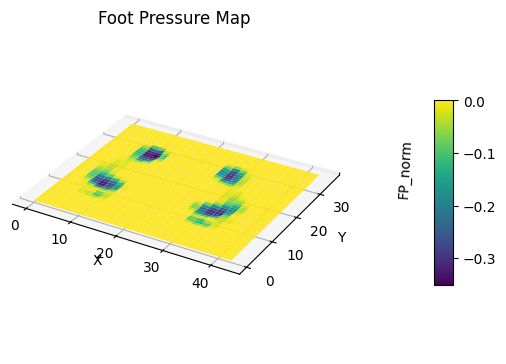

In [8]:
# Create a 3D surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, FP_norm, cmap='viridis')

# Add labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('FP_norm')
ax.set_title('Foot Pressure Map')

# Make axes equal in length
ax.set_box_aspect([np.ptp(arr) for arr in [X, Y, FP_norm]])

# Disable Z-axis tick labels
ax.set_zticks([])
ax.set_zticklabels([])

# Add a colorbar
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10, pad=0.2)

# Show the plot
plt.show()

### Export pointcloud data as csv

A csv file named 'output_FP_Pointcloud.csv' will be exported to the same folder as this notebook.

In [9]:
# csv file path
csv_file_path = 'output_FP_Pointcloud.csv'

# create csv using pandas data frame
FP_Pointcloud_df = pd.DataFrame(FP_Pointcloud)
FP_Pointcloud_df.to_csv(csv_file_path, index=False, header=False)

print(f"CSV file '{csv_file_path}' created successfully.")

CSV file 'output_FP_Pointcloud.csv' created successfully.


---------